In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
startups = pd.read_csv('C:/Users/oyedeepak/Downloads/Assignment/Multi Linear Regression/50_Startups.csv')

In [3]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# convert the column into categorical values
#avoid dummy variable trap

states= pd.get_dummies(startups['State'], drop_first= True)

In [6]:
# drop the State column

startups= startups.drop('State', axis= 1)

In [7]:
# concat the dummy variables

startups= pd.concat([startups, states], axis= 1)
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [8]:
startups.rename(columns= {'R&D Spend':'RD_spend', 'Marketing Spend': 'marketing_spend', 'New York': 'NewYork'}, inplace= True)
startups.head()

,RD_spend,Administration,marketing_spend,Profit,Florida,NewYork
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


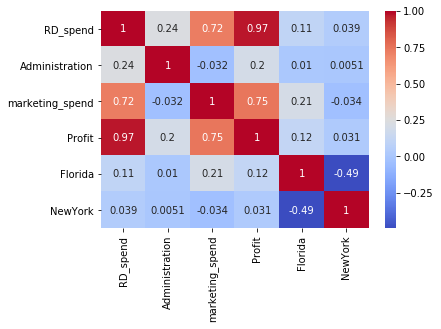

In [64]:
import seaborn as sns
sns.heatmap(startups.corr(), cmap= 'coolwarm', annot= True)


In [9]:
X=  startups.drop('Profit', axis= 1)
Y= startups.Profit

In [10]:
# splitting the dataset into test and train

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state= 5)

In [11]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# predicting the Test set results

Y_pred= regressor.predict(X_test)

In [13]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_pred)
print(score)

0.9669763022157343


In [25]:
#Model 1

import statsmodels.formula.api as smf
m1=smf.ols("Profit~RD_spend+Administration+marketing_spend+Florida+NewYork",data=startups).fit()


m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 13 May 2020   Prob (F-statistic):           1.34e-27
Time:                        14:30:48   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
RD_spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
marketing_spend     0.0270      0.017      1.574      0.123      -0.008       0.062
Florida           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
NewYork           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Model 2

# Since correlation between RD_Spend and Profit is 0.97
m2=smf.ols("Profit~RD_spend",data=startups).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 13 May 2020   Prob (F-statistic):           3.50e-32
Time:                        14:30:12   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD_spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Model 3 

#Now, we will remove RD_Spend and check the R-square value

m3=smf.ols("Profit~Administration+marketing_spend+Florida+NewYork",data=startups).fit()


m3.summary()

#R-squared value has drastically reduced, Adj. R-squared value has reduced even more.
#We can say that there is a lot of impact of RD_Spend on profit

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     17.83
Date:                Wed, 13 May 2020   Prob (F-statistic):           7.78e-09
Time:                        14:30:28   Log-Likelihood:                -576.91
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      45   BIC:                             1173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.903e+04   1.84e+04      1.033      0.307   -1.81e+04    5.61e+04
Administration      0.3239      0.133      2.426      0.019       0.055       0.593
marketing_spend     0.2507      0.031      7.997      0.000       0.188       0.314
Florida         -1703.7028   9337.989     -0.182      0.856   -2.05e+04    1.71e+04
NewYork          3875.7625   9002.603      0.431      0.669   -1.43e+04     2.2e+04
==============================================================================
Omnibus:                        5.729   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.349
Skew:                          -0.461   Prob(JB):                       0.0689
Kurtosis:                       4.311   Cond. No.                     1.34e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#Model 4

#Since Marketing and RD_Spend are highly correlated, we will take these two only
m4=smf.ols("Profit~RD_spend+marketing_spend",data=startups).fit()
type(m4)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [22]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 13 May 2020   Prob (F-statistic):           2.16e-31
Time:                        14:29:34   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_spend            0.7966      0.041     19.266      0.000       0.713       0.880
marketing_spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#Model 5

#correlation between Profit and Marketing spend is 0.75, so we will keep only Marketing spend

m5=smf.ols("Profit~marketing_spend",data=startups).fit()

m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 13 May 2020   Prob (F-statistic):           4.38e-10
Time:                        14:36:49   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketing_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
data = {'Model':['m1', 'm2', 'm3', 'm4', 'm5'],
           'R-Squared': [0.951, 0.947, 0.613, 0.950, 0.559],
           'Adj. R-Squared': [0.945, 0.945, 0.579, 0.948, 0.550],
           'Comments': ['All variables included', 'Only RD_Spend included', 'RD_Spend removed', 'Only RD_Spend, marketing_spend included', 'Only marketing_spend included']}

In [32]:
R_sq = pd.DataFrame(data, columns= ['Model', 'R-Squared', 'Adj. R-Squared', 'Comments'])

In [33]:
R_sq.head()

,Model,R-Squared,Adj. R-Squared,Comments
0,m1,0.951,0.945,All variables included
1,m2,0.947,0.945,Only RD_Spend included
2,m3,0.613,0.579,RD_Spend removed
3,m4,0.950,0.948,"Only RD_Spend, marketing_spend included"
4,m5,0.559,0.550,Only marketing_spend included
